## Homework Assignment 1 for AST3101H Solutions

Author(s): Maya Fishbach

Assigned: 15 Sep 2023

Due: 25 Sep 2023

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import numpy as np

### Problem 1)

#### Background:

[Peters (1964)](https://link.aps.org/doi/10.1103/PhysRev.136.B1224) derives the orbital evolution of two point masses $m_1$ and $m_2$ due to gravitational radiation (i.e., the gravitational-wave "inspiral," in which orbital energy and angular momentum are carried away by gravitational waves).

Peters derives the rate of decay of the orbital semi-major axis $a$ and eccentricity $e$, $\langle \frac{da}{dt} \rangle$ and $\langle \frac{de}{dt} \rangle$ as a function of the component masses $m_1$ and $m_2$, the orbital separation $a$ and the eccentricity $e$. (The brackets $\langle \ldots \rangle$ denote a time average over $\sim1$ orbit.) 

He then uses these differential equations to solve for the time $T$ that it takes to evolve two masses $m_1$ and $m_2$ from an initial semi-major axis $a = a_0$ and eccentricity $e = e_0$ to a semi-major axis of $a = 0$ and eccentricity $e = e_0$ (i.e., the time it takes for $m_1$ and $m_2$ to merge.) $T$ is known as the gravitational-wave inspiral time.

### 1(a)
For the circular case ($e_0 = 0$), the inspiral time $T_c$ ($c$ for circular) is given by:
$$
T_c(m_1, m_2, a_0) = \frac{a_0^4}{4\beta(m_1, m_2)},
$$
where 
$$
\beta(m_1, m_2) = \frac{64}{5}\frac{G^3}{c^5}m_1m_2(m_1+m_2)
$$

Make a plot of $T_c$ (in Gyr) versus $a_0$ (in solar radii) for two 10-solar mass black holes ($m_1 = m_2 = 10\,M_\odot$). 

Overplot (on the same axes) the result for two 20-solar mass black holes and two 30-solar mass black holes.

Text(0.5, 1.0, 'GW inspiral time versus initial orbital semi-major axis')

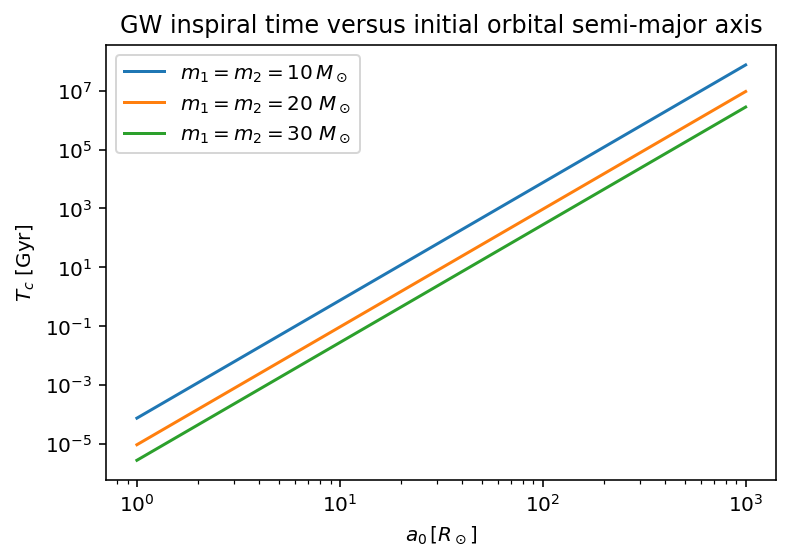

In [2]:
###Code to answer (1a) goes here.

def beta_func(m1, m2):
    '''
    m1: mass_1 in solar masses Msun
    m2: mass_2 in solar masses Msun
    return: beta in units of [solar radius Rsun]^4 [Gyr]^[-1]
    '''
    
    G = 3.92e26 ##in units of [Msun]^-1 [Rsun]^3 [Gyr]^-2
    
    c = 1.359e16 ##in units of [Rsun][Gyr]^-1
    
    beta = (64/5) * G**3 * c**-5 * m1 * m2 * (m1 + m2)
    
    return beta

def Tc_func(m1, m2, a0):
    '''
    m1: mass_1 in Msun
    m2: mass_2 in Msun
    a0: initial semi-major axis in Rsun
    return: Tc in units of Rsun
    '''
    
    beta = beta_func(m1, m2)
    Tc = a0**4 / (4 * beta)
    
    return Tc

#### m1 = m2 = 10
m1 = 10
m2 = 10

a0s = np.logspace(0, 3, 100) #set up log-spaced grid of initial semi-major axis from 1-10^3 solar radii 

Tcs = Tc_func(m1, m2, a0s)

plt.plot(a0s, Tcs, label = r'$m_1 = m_2 = 10\,M_\odot$')

### REPEAT FOR DIFFERENT m1, m2

def make_plot(m):
    Tcs = Tc_func(m, m, a0s)
    plt.plot(a0s, Tcs, label = r'$m_1 = m_2 =$'+ f'{m}' + r' $M_\odot$')

make_plot(m = 20)
make_plot(m = 30)

plt.xlabel(r'$a_0\,[R_\odot]$')

plt.ylabel(r'$T_c$ [Gyr]')

###Play around with turning off log-log plots if desired
plt.xscale('log') 
plt.yscale('log')

plt.legend()

plt.title('GW inspiral time versus initial orbital semi-major axis') ### TITLE YOUR PLOT

### 1(b) 
Fix $T_c = 14$ Gyr (roughly the age of the Universe), and plot $a_0$ as a function of the total mass $m_1 + m_2$ for equal-mass binaries ($m_1 = m_2$).

Overplot the result for two different mass ratios $q \equiv m_2/ m_1$: $q = 0.5$ and $q = 0.1$. Here we define $m_2$ to be smaller than (or equal to) $m_1$ so that $q \leq 1$.

Text(0.5, 1.0, 'Initial semi-major axis required for a binary with a given total mass to merge within 14 Gyr')

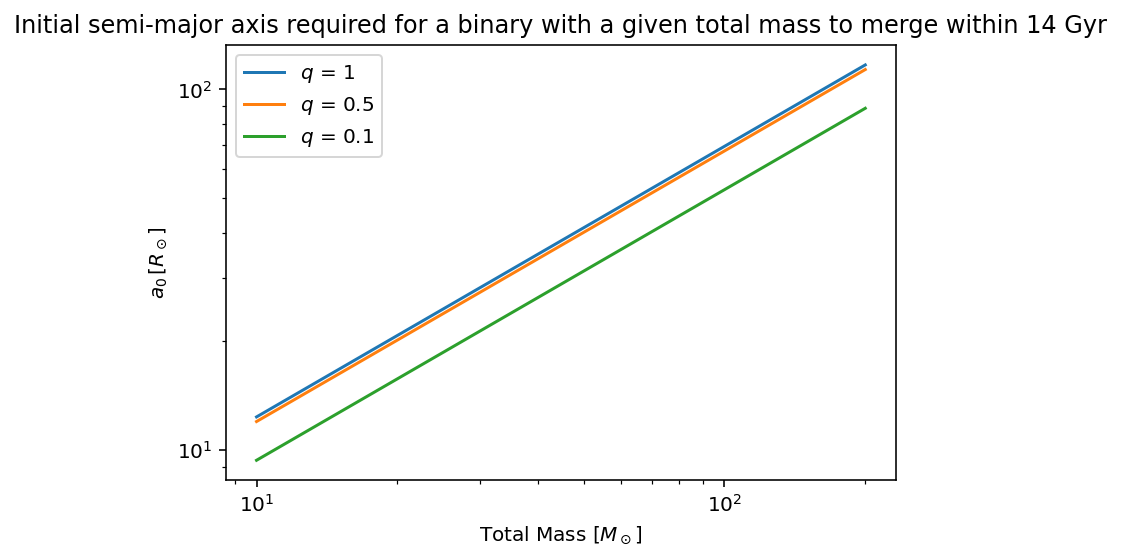

In [3]:
#Code to answer (1b) goes here.

def m1_and_m2_from_Mtot_q(Mtot, q):
    '''
    Mtot: total mass m1 + m2
    q: mass ratio m2/ m1
    returns: component masses m1, m2
    '''
    m1 = Mtot / (1 + q)
    m2 = q * m1
    
    return m1, m2

def a0_from_fixed_Tc(Mtot, q, Tc = 14):
    '''
    Mtot: total mass m1 + m2
    q: mass ratio m2/ m1
    Tc: GW inspiral time for a circular orbit in Gyr, default value is 14 Gyr (age of Universe) 
    '''
    m1, m2 = m1_and_m2_from_Mtot_q(Mtot, q)
    
    beta = beta_func(m1, m2)
    
    a0 = (Tc * 4 * beta)**0.25
    
    return a0

### Make your plot

Mtots = np.linspace(10, 200, 100)

qs = [1, 0.5, 0.1]

for q in qs:
    
    a0s = a0_from_fixed_Tc(Mtots, q)
    
    plt.plot(Mtots, a0s, label = f'$q$ = {q}')
    
plt.xlabel('Total Mass [$M_\odot$]')
plt.ylabel(r'$a_0\,[R_\odot]$')

plt.legend(loc = 'best')

###Play around with turnning off log-log plots if desired
plt.xscale('log') 
plt.yscale('log')

plt.title('Initial semi-major axis required for a binary with a given total mass to merge within 14 Gyr') ### TITLE YOUR PLOT

### Problem 2)

#### Background:
Common envelope evolution (see [Ivanova et al. 2013](https://link.springer.com/article/10.1007/s00159-013-0059-2) for a review) is typically approximated with an energy balance equation describing the transfer of binary orbital energy $E_\mathrm{orb}$ to the binding energy $E_\mathrm{bind}$ of the common envelope. The idea is that some of the binary's orbital energy gets transferred to unbind the common envelope. When the common envelope is expelled, it carries away this orbital energy, and as a result, the binary tightens. However, the the common envelope efficiency $\alpha$ is not known. $\alpha$ is defined so that:

$$
E_\mathrm{bind} = \alpha \times \Delta E_\mathrm{orb}
$$

where the common envelope binding energy $E_\mathrm{bind}$ depends on the detailed stellar structure of the star that initiates the common envelope (the donor star), and

$$
\Delta E_\mathrm{orb} = \frac{1}{2} G \Big( -\frac{m_{1,i} m_2}{a_i} + \frac{m_{1,f} m_2}{a_f} \Big)  
$$

where $m_{1,i}$ is the initial mass of the star initiating common envelope, $m_{1,f}$ is its post-common envelope mass, $m_2$ is the companion mass, $a_i$ is the initial orbital separation and $a_f$ is the final orbital separation.

The value of $\alpha$ is highly uncertain, and may be smaller or larger than 1.


#### Question:
Fixing all other parameters of the system, describe how the final orbital separation depends on $\alpha$. For large values of $\alpha > 1$, would the final orbital separation be larger or smaller compared to small values of $\alpha < 1$? How do you think the value of $\alpha$ affects the merger rate of binary black holes that are formed from common envelope evolution? (No numerical results required, just explain in a couple of sentences.)

#### Answer:
Note that the original phrasing of this question was confusing because it referred to the "efficiency of the common envelope in carrying away orbital energy." This is misleading -- sorry! The efficiency $\alpha$ refers to the efficiency of the common envelope in converting orbital energy to counteract the envelope's binding energy. More efficient common evelopes need less orbital energy to expel their envelopes. Therefore, large values of $\alpha$ will cause the binary to tighten less (end up with a wider orbital separation) compared to small values of $\alpha$, whcih will cause the binary to tighten more. Therefore, large values of $\alpha$ will result in wider post-common envelope binaries, which may not merge within a Hubble time. However, sometimes $\alpha$ is too small, so that the common envelope donor star merges with its compact object companion before the envelope is successfully ejected. This will also fail to result in a compact binary that can merge through gravitational radiation. 